# Linear Models

### imports and Load CIFAR-10 dataset

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim

In [2]:
data_folder = './../Data/cifar/cifar-10/'
Xtr = np.load(data_folder + 'Xtr.npy')
ytr = np.load(data_folder + 'ytr.npy')
Xte = np.load(data_folder + 'Xte.npy')
yte = np.load(data_folder + 'yte.npy')
labels = read_dictionary = np.load(data_folder + 'labels_dict.npy',allow_pickle='TRUE').item()
true_shape = (32, 32, 3)
# transpose to (1,2,0)
n = int(Xtr.shape[0]*0.8)
Xtr , Xval = Xtr[:n] , Xtr[n:]
ytr , yval = ytr[:n] , ytr[n:]
Xtr.shape , ytr.shape , Xval.shape , yval.shape , Xte.shape , yte.shape , len(labels) , labels

((40000, 3072),
 (40000,),
 (10000, 3072),
 (10000,),
 (10000, 3072),
 (10000,),
 10,
 {0: 'jetliner',
  1: 'shooting',
  2: 'gamecock',
  3: 'domestic',
  4: 'wapiti',
  5: 'toy',
  6: 'green',
  7: 'lippizan',
  8: 'hydrofoil',
  9: 'dustcart'})

## Version 1 - Linear Model

In [3]:
W = np.random.rand( len(labels) , Xtr.shape[1] )
b = np.random.rand( len(labels) , 1)
def linear1(x , W , b):
    return np.dot(W , x.reshape(-1,1)) + b 
linear1(Xtr[0] , W , b)

array([[157310.00831477],
       [160630.60010917],
       [158989.13148733],
       [161847.22101111],
       [160886.47368471],
       [161098.39584642],
       [162612.17944048],
       [161675.64894155],
       [157615.24218909],
       [162365.13274318]])

In [4]:
W.shape ,b.shape , Xtr[0].shape , linear1(Xtr[0] , W , b).shape

((10, 3072), (10, 1), (3072,), (10, 1))

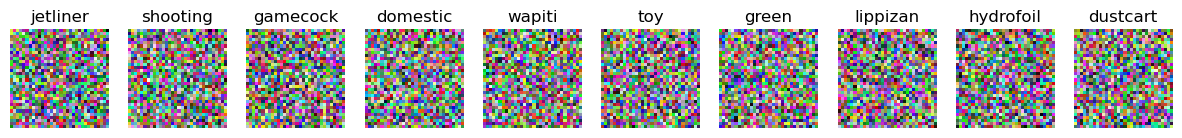

In [5]:
def plot_W(W, labels, true_shape):
    num_images = W.shape[0]
    W_clipped = W.copy()
    W_clipped -= np.min(W_clipped) 
    W_clipped /= np.max(W_clipped)
    W_clipped *= 255
    W_clipped = W_clipped.astype(np.uint8)
    
    fig, axes = plt.subplots(1, num_images, figsize=(15, 15))
    for i in range(num_images):
        image = W_clipped[i].reshape(3,32,32).transpose(1,2,0)
        _ = axes[i].imshow(image)
        _ = axes[i].set_title(labels[i])
        _ = axes[i].axis('off')
    plt.show()
plot_W(W , labels , true_shape)

In [6]:
Xtr = torch.tensor(Xtr , dtype = torch.float32)
ytr = torch.tensor(ytr , dtype = torch.float32)
Xval = torch.tensor(Xval , dtype = torch.float32)
yval = torch.tensor(yval , dtype = torch.float32)
Xte = torch.tensor(Xte , dtype = torch.float32)
yte = torch.tensor(yte , dtype = torch.float32)

In [7]:
ytr_enc = torch.zeros(ytr.shape[0] , len(labels)) 
yval_enc = torch.zeros(yval.shape[0] , len(labels))
yte_enc = torch.zeros(yte.shape[0] , len(labels))

ytr_enc[torch.arange(ytr.shape[0]) , ytr.long()] = 1
yval_enc[torch.arange(yval.shape[0]) , yval.long()] = 1
yte_enc[torch.arange(yte.shape[0]) , yte.long()] = 1

## Version 2 - Linear Model 

In [8]:
# Define the custom Linear model
class Linear1(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(Linear1, self).__init__()
        # Initialize weights and bias
        self.W = nn.Parameter(torch.rand(input_dim, output_dim) * 0.0001)  # Small random values
        self.b = nn.Parameter(torch.rand(output_dim))  # Bias initialized to zero

    def forward(self, x):
        return x @ self.W + self.b

# Hyperparameters
input_dim = Xtr.shape[1]
output_dim = len(labels)
learning_rate = 1e-5
num_epochs = 10

# Initialize the model, loss, and optimizer
model = Linear1(input_dim, output_dim)
criterion = nn.MSELoss()
optimizer = optim.AdamW(model.parameters(), lr=learning_rate)

In [9]:

# Training loop
for epoch in range(num_epochs):
    # Forward pass
    predictions = model(Xtr)
    loss = criterion(predictions, ytr_enc)

    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print loss
    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {loss.item():.4f}")

criterion(model(Xtr), ytr_enc).item()

Epoch 1/10, Loss: 390.0252
Epoch 2/10, Loss: 253.2957
Epoch 3/10, Loss: 147.0318
Epoch 4/10, Loss: 71.0370
Epoch 5/10, Loss: 23.9424
Epoch 6/10, Loss: 2.6751
Epoch 7/10, Loss: 2.0566
Epoch 8/10, Loss: 14.9645
Epoch 9/10, Loss: 33.4277
Epoch 10/10, Loss: 50.3959


61.23088836669922

In [10]:
W_ = model.W.data.numpy()
b_ = model.b.data.numpy()
b_ = b_.reshape(-1,1)
W_.shape , b_.shape 

((3072, 10), (10, 1))

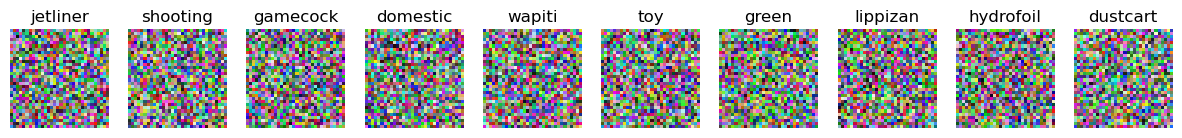

In [11]:
plot_W(W_.T, labels, true_shape)

Epoch 100/1000, Loss: 0.1057
Epoch 200/1000, Loss: 0.1002
Epoch 300/1000, Loss: 0.0986
Epoch 400/1000, Loss: 0.0976
Epoch 500/1000, Loss: 0.0969
Epoch 600/1000, Loss: 0.0963
Epoch 700/1000, Loss: 0.0959
Epoch 800/1000, Loss: 0.0955
Epoch 900/1000, Loss: 0.0951
Epoch 1000/1000, Loss: 0.0948


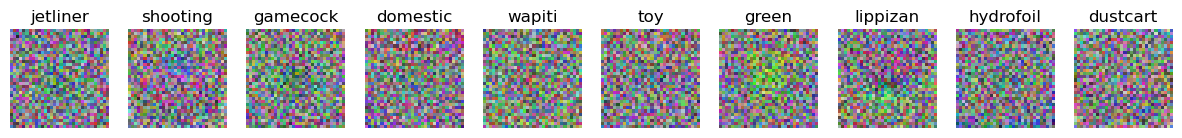

In [12]:
num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass
    predictions = model(Xtr)
    loss = criterion(predictions, ytr_enc)

    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print loss
    if (epoch + 1) % (num_epochs // 10) == 0:
        print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {loss.item():.4f}")

plot_W(model.W.data.numpy().T, labels, true_shape)

In [13]:
np.array(list(labels.keys()))

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [14]:
inds = []
for i in range(10):
    inds.append(np.where(ytr == i)[0][10])
inds

[179, 75, 57, 78, 98, 156, 124, 87, 161, 76]

In [15]:
Wk = Xtr[inds].data.numpy()
Wk

array([[  2.,   1.,   1., ...,   1.,   1.,   1.],
       [ 65.,  76., 188., ..., 107., 108., 110.],
       [ 66.,  71.,  88., ..., 116., 113., 111.],
       ...,
       [ 39.,  40.,  41., ...,  98.,  98.,  95.],
       [113., 113., 113., ...,  22.,  27.,  27.],
       [118., 110., 118., ..., 128., 127., 119.]], dtype=float32)

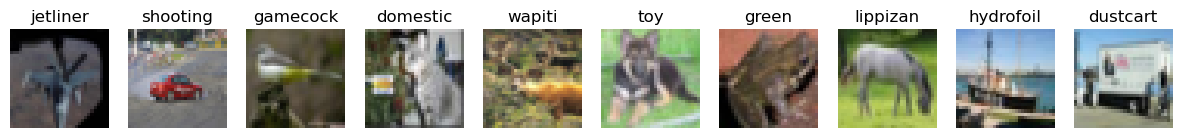

In [16]:
plot_W(Wk, labels, true_shape)

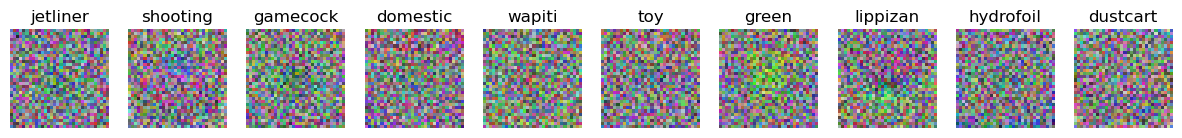

In [17]:
plot_W(model.W.data.numpy().T, labels, true_shape)

In [18]:
optimizer.param_groups[0]['lr'] = 1e-6

Epoch 0/10000, Loss: 0.0948
Epoch 1000/10000, Loss: 0.0945
Epoch 2000/10000, Loss: 0.0940
Epoch 3000/10000, Loss: 0.0935
Epoch 4000/10000, Loss: 0.0930
Epoch 5000/10000, Loss: 0.0925
Epoch 6000/10000, Loss: 0.0920
Epoch 7000/10000, Loss: 0.0915
Epoch 8000/10000, Loss: 0.0910
Epoch 9000/10000, Loss: 0.0911
Epoch 10000/10000, Loss: 0.0903


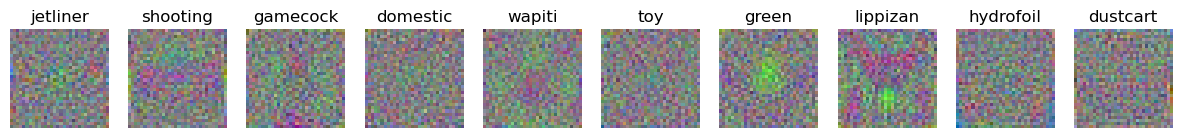

In [19]:
num_epochs = 10000
print(f"Epoch {0}/{num_epochs}, Loss: {loss.item():.4f}")
for epoch in range(num_epochs):
    # Forward pass
    predictions = model(Xtr)
    loss = criterion(predictions, ytr_enc)

    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print loss
    if (epoch + 1) % (num_epochs // 10) == 0:
        print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {loss.item():.4f}")

plot_W(model.W.data.numpy().T, labels, true_shape)

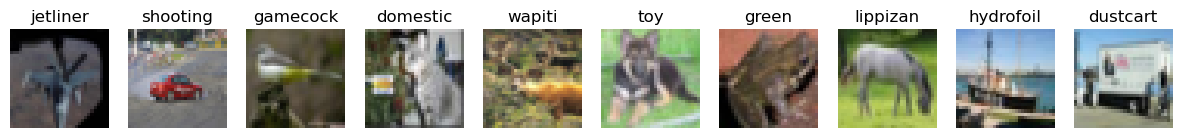

In [ ]:
plot_W(Wk, labels, true_shape)

Epoch 0/10000, Loss: 0.0903
Epoch 1000/10000, Loss: 0.0900
Epoch 2000/10000, Loss: 0.0900
Epoch 3000/10000, Loss: 0.0896
Epoch 4000/10000, Loss: 0.0894
Epoch 5000/10000, Loss: 0.0894
Epoch 6000/10000, Loss: 0.0892
Epoch 7000/10000, Loss: 0.0890
Epoch 8000/10000, Loss: 0.0889
Epoch 9000/10000, Loss: 0.0889
Epoch 10000/10000, Loss: 0.0889


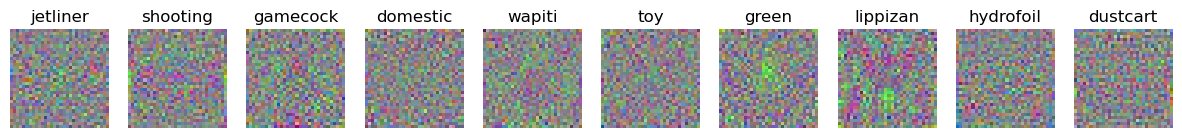

In [21]:
num_epochs = 10000
print(f"Epoch {0}/{num_epochs}, Loss: {loss.item():.4f}")
for epoch in range(num_epochs):
    # Forward pass
    predictions = model(Xtr)
    loss = criterion(predictions, ytr_enc)

    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print loss
    if (epoch + 1) % (num_epochs // 10) == 0:
        print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {loss.item():.4f}")

plot_W(model.W.data.numpy().T, labels, true_shape)

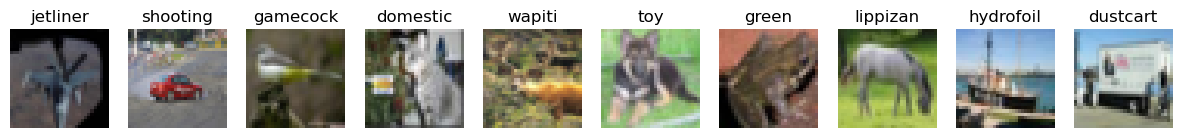

In [22]:
plot_W(Wk, labels, true_shape)

Epoch 0/10000, Loss: 0.0889
Epoch 1000/10000, Loss: 0.0886
Epoch 2000/10000, Loss: 0.0885
Epoch 3000/10000, Loss: 0.0885
Epoch 4000/10000, Loss: 0.0884
Epoch 5000/10000, Loss: 0.0883
Epoch 6000/10000, Loss: 0.0882
Epoch 7000/10000, Loss: 0.0881
Epoch 8000/10000, Loss: 0.0881
Epoch 9000/10000, Loss: 0.0881
Epoch 10000/10000, Loss: 0.0879


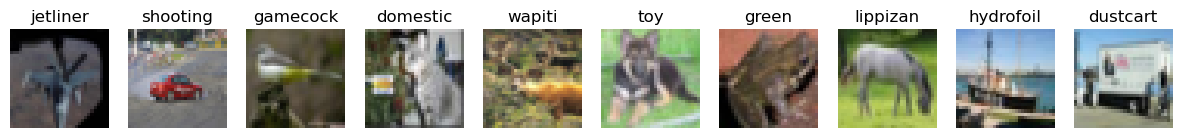

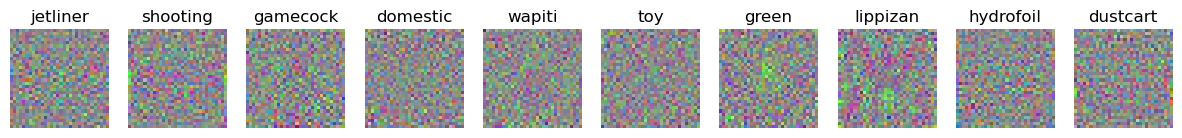

In [23]:
num_epochs = 10000
print(f"Epoch {0}/{num_epochs}, Loss: {loss.item():.4f}")
for epoch in range(num_epochs):
    # Forward pass
    predictions = model(Xtr)
    loss = criterion(predictions, ytr_enc)

    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print loss
    if (epoch + 1) % (num_epochs // 10) == 0:
        print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {loss.item():.4f}")

plot_W(Wk, labels, true_shape)
plot_W(model.W.data.numpy().T, labels, true_shape)

Epoch 0/10000, Loss: 0.0879
Epoch 1000/10000, Loss: 0.0878
Epoch 2000/10000, Loss: 0.0879
Epoch 3000/10000, Loss: 0.0879
Epoch 4000/10000, Loss: 0.0876
Epoch 5000/10000, Loss: 0.0876
Epoch 6000/10000, Loss: 0.0876
Epoch 7000/10000, Loss: 0.0874
Epoch 8000/10000, Loss: 0.0873
Epoch 9000/10000, Loss: 0.0873
Epoch 10000/10000, Loss: 0.0873


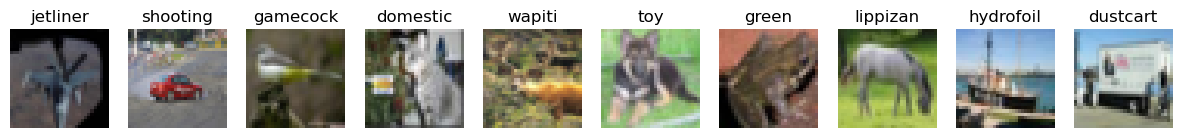

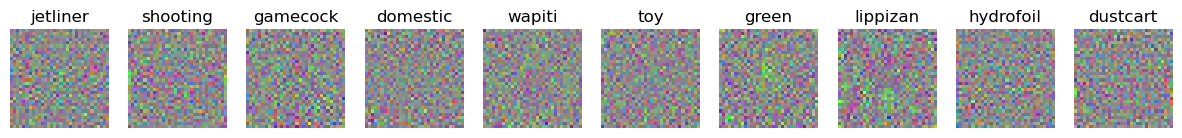

In [24]:
num_epochs = 10000
print(f"Epoch {0}/{num_epochs}, Loss: {loss.item():.4f}")
for epoch in range(num_epochs):
    # Forward pass
    predictions = model(Xtr)
    loss = criterion(predictions, ytr_enc)

    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print loss
    if (epoch + 1) % (num_epochs // 10) == 0:
        print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {loss.item():.4f}")

plot_W(Wk, labels, true_shape)
plot_W(model.W.data.numpy().T, labels, true_shape)